In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving weatherAUS.csv to weatherAUS.csv


In [ ]:
# Load the dataset into a DataFrame
df = pd.read_csv("weatherAUS.csv")

# Show the first 5 rows
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
# Check how many missing values are there
df.isnull().sum()


,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [ ]:
# Keep only useful columns
df = df[['Rainfall', 'Humidity3pm', 'Pressure9am', 'Temp3pm', 'RainTomorrow']]

# Drop rows with any missing values
df = df.dropna()

# Confirm again
df.isnull().sum()


,0
Rainfall,0
Humidity3pm,0
Pressure9am,0
Temp3pm,0
RainTomorrow,0


In [ ]:
# Convert Yes to 1, No to 0
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

# Check to confirm
df.head()


,Rainfall,Humidity3pm,Pressure9am,Temp3pm,RainTomorrow
0,0.6,22.0,1007.7,21.8,0
1,0.0,25.0,1010.6,24.3,0
2,0.0,30.0,1007.6,23.2,0
3,0.0,16.0,1017.6,26.5,0
4,1.0,33.0,1010.8,29.7,0


In [ ]:
X = df[['Rainfall', 'Humidity3pm', 'Pressure9am', 'Temp3pm']]
y = df['RainTomorrow']


In [ ]:
from sklearn.model_selection import train_test_split

# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Limit depth to make it simple and fast
model = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the model
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
# Predict on test data
y_pred = model.predict(X_test)

# Check accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8371962466917956


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Show confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Show full report (precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[18067  1346]
 [ 2714  2811]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     19413
           1       0.68      0.51      0.58      5525

    accuracy                           0.84     24938
   macro avg       0.77      0.72      0.74     24938
weighted avg       0.83      0.84      0.83     24938



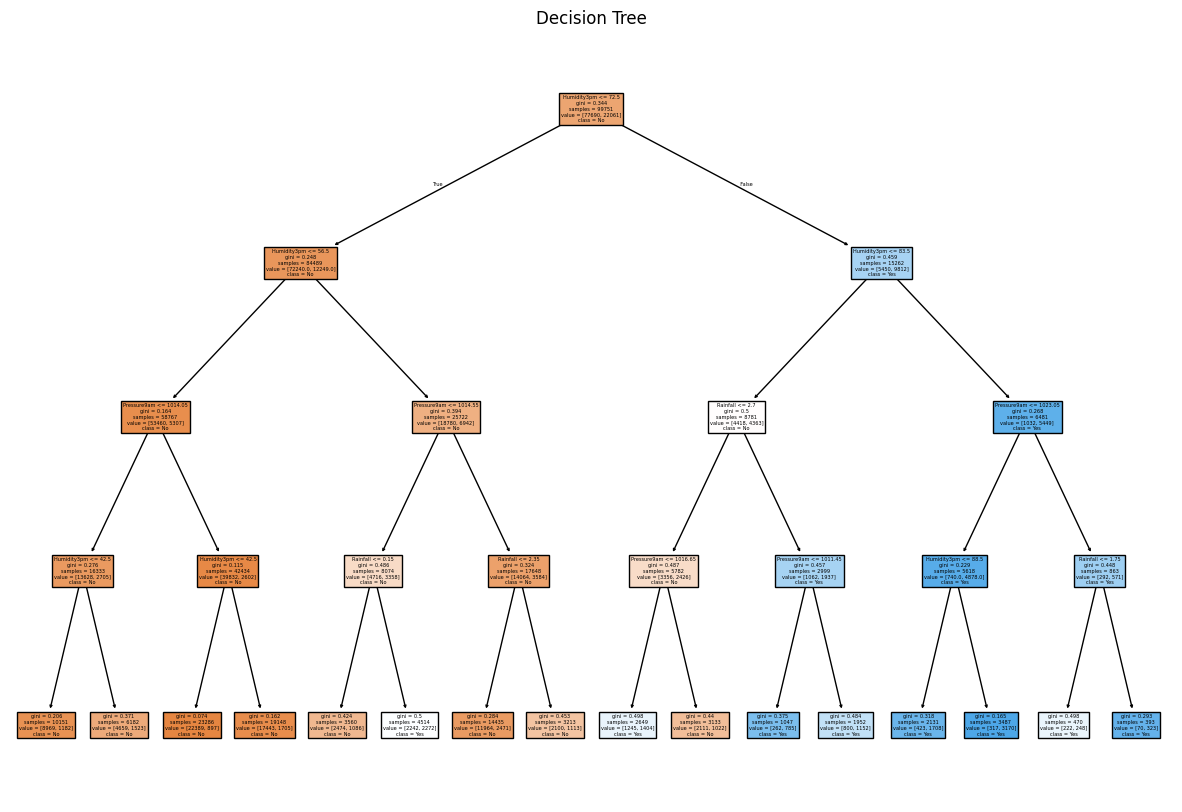

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plot_tree(model, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree")
plt.show()


In [ ]:
# Predict if it will rain tomorrow based on these values:
# Format: [Rainfall, Humidity3pm, Pressure9am, Temp3pm]
import pandas as pd

# Create a DataFrame for the input sample
sample = pd.DataFrame([[2.0, 65.0, 1012.0, 22.0]], columns=["Rainfall", "Humidity3pm", "Pressure9am", "Temp3pm"])

# Predict
prediction = model.predict(sample)

print("Will it rain tomorrow? ", "Yes" if prediction[0] == 1 else "No")


Will it rain tomorrow?  Yes
